# Load Libraries and Data

In [82]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#load csv containing return data on assets
assets = pd.read_csv('/home/FANG_Port.csv',header='infer',index_col='Date') 

In [83]:
assets.head(5)

,GOOGL,FB,NFLX,AMZN
Date,,,,
2015-04-01,549.489990,81.669998,59.017143,370.260010
2015-04-02,541.309998,81.559998,59.154285,372.250000
2015-04-06,543.950012,82.440002,60.330002,377.040009
2015-04-07,544.859985,82.320000,60.494286,374.410004
2015-04-08,548.840027,82.279999,63.049999,381.200012


In [84]:
assets.tail(5) 

,GOOGL,FB,NFLX,AMZN
Date,,,,
2018-03-23,1026.550049,159.389999,300.940002,1495.560059
2018-03-26,1054.089966,160.059998,320.350006,1555.859985
2018-03-27,1006.940002,152.220001,300.690002,1497.050049
2018-03-28,1005.179993,153.029999,285.769989,1431.420044
2018-03-29,1037.140015,159.789993,295.350006,1447.339966


# Calculate Daily Returns 

In [85]:
returns = (assets/assets.shift(1))-1
returns.head()

,GOOGL,FB,NFLX,AMZN
Date,,,,
2015-04-01,NaN,NaN,NaN,NaN
2015-04-02,-0.014887,-0.001347,0.002324,0.005375
2015-04-06,0.004877,0.010790,0.019875,0.012868
2015-04-07,0.001673,-0.001456,0.002723,-0.006975
2015-04-08,0.007305,-0.000486,0.042247,0.018135


# Check Distribution of Returns

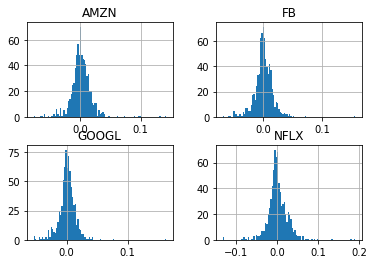

In [86]:
#Create Histogram to check distribution
returns.hist(bins=100)
plt.show()

# Calculate Log Returns

In [87]:
log_returns = np.log((assets/assets.shift(1)))

In [88]:
log_returns.head()

,GOOGL,FB,NFLX,AMZN
Date,,,,
2015-04-01,NaN,NaN,NaN,NaN
2015-04-02,-0.014998,-0.001348,0.002321,0.005360
2015-04-06,0.004865,0.010732,0.019680,0.012786
2015-04-07,0.001672,-0.001457,0.002719,-0.007000
2015-04-08,0.007278,-0.000486,0.041379,0.017973


In [89]:
log_returns.mean()*252

GOOGL    0.212306
FB       0.224318
NFLX     0.538202
AMZN     0.455631
dtype: float64

# Covariance Matrix

In [90]:
log_returns.cov()*252

,GOOGL,FB,NFLX,AMZN
GOOGL,0.051703,0.037923,0.040084,0.037761
FB,0.037923,0.063865,0.041359,0.041199
NFLX,0.040084,0.041359,0.174764,0.048329
AMZN,0.037761,0.041199,0.048329,0.077447


# Correlation Matrix

In [91]:
log_returns.corr()

,GOOGL,FB,NFLX,AMZN
GOOGL,1.000000,0.659948,0.421682,0.596727
FB,0.659948,1.000000,0.391481,0.585806
NFLX,0.421682,0.391481,1.000000,0.415408
AMZN,0.596727,0.585806,0.415408,1.000000


# Generate Random Weights

In [92]:
number_assets = len(assets.columns)
number_assets

4

In [101]:
weights = np.random.random(number_assets)

In [102]:
weights /= np.sum(weights)
weights

array([0.32743513, 0.08800848, 0.40601685, 0.17853954])

# Weights must sum to 1  

In [103]:
weights[0]+weights[1]+weights[2]+weights[3] 

1.0

# Expected Portfolio Returns

In [104]:
exp_por_ret = np.sum(weights * log_returns.mean())*252
exp_por_ret

0.38912523435680413

# Expected Portfolio Variance

In [105]:
exp_por_var = np.dot(weights.T,np.dot(log_returns.cov()*252,weights))
exp_por_var

0.0658321490758523

# Expected Portfolio Volitility

In [106]:
exp_por_vol = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252,weights)))
exp_por_vol

0.2565777641882716